# **CUSTOMER CONVERSION PREDICTION**

**We are performing Expoloratory data analysis for better understanding of data and draw insights from it.**

In [5]:
import pandas as pd
df = pd.read_excel('Customer Conversion Prediction.xlsx')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [6]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [7]:
df.shape

(45211, 11)

In [10]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [13]:
df.isnull().any()

age               False
job               False
marital           False
education_qual    False
call_type         False
day               False
mon               False
dur               False
num_calls         False
prev_outcome      False
y                 False
dtype: bool

In [14]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

**EDA - Exploratory Data Analysis**

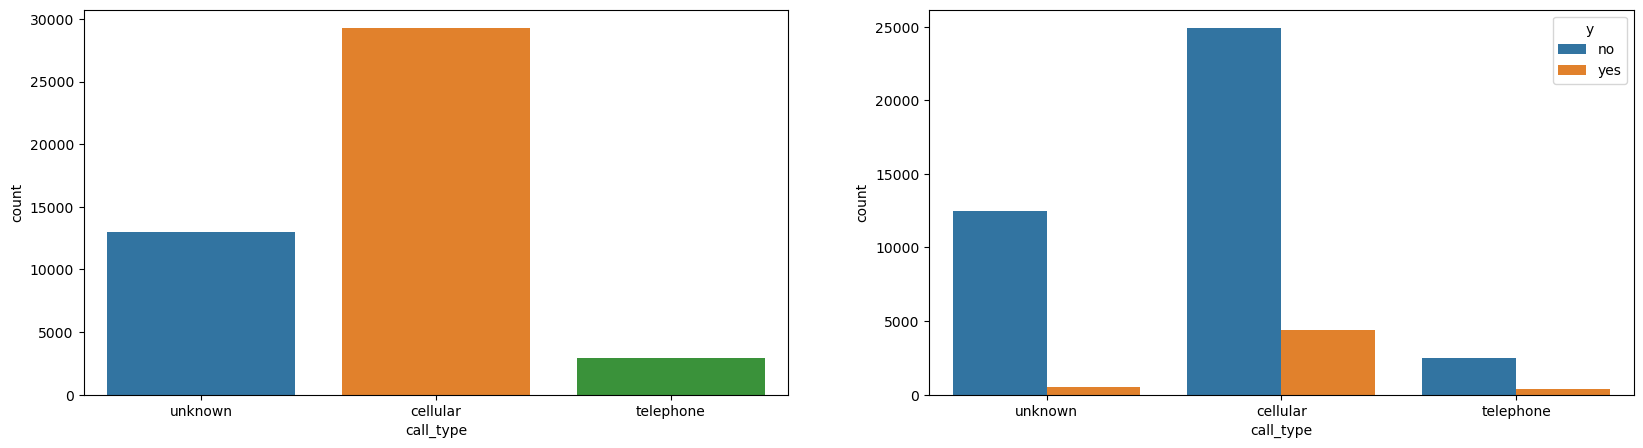

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='call_type',ax=axes[0],data=df)
sns.countplot(x='call_type', hue='y',ax=axes[1], data=df)
plt.show()

**Observation:
From above stats, we conclude that cellular type conversation is contributing a lot towards customers opting for insurance plan.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

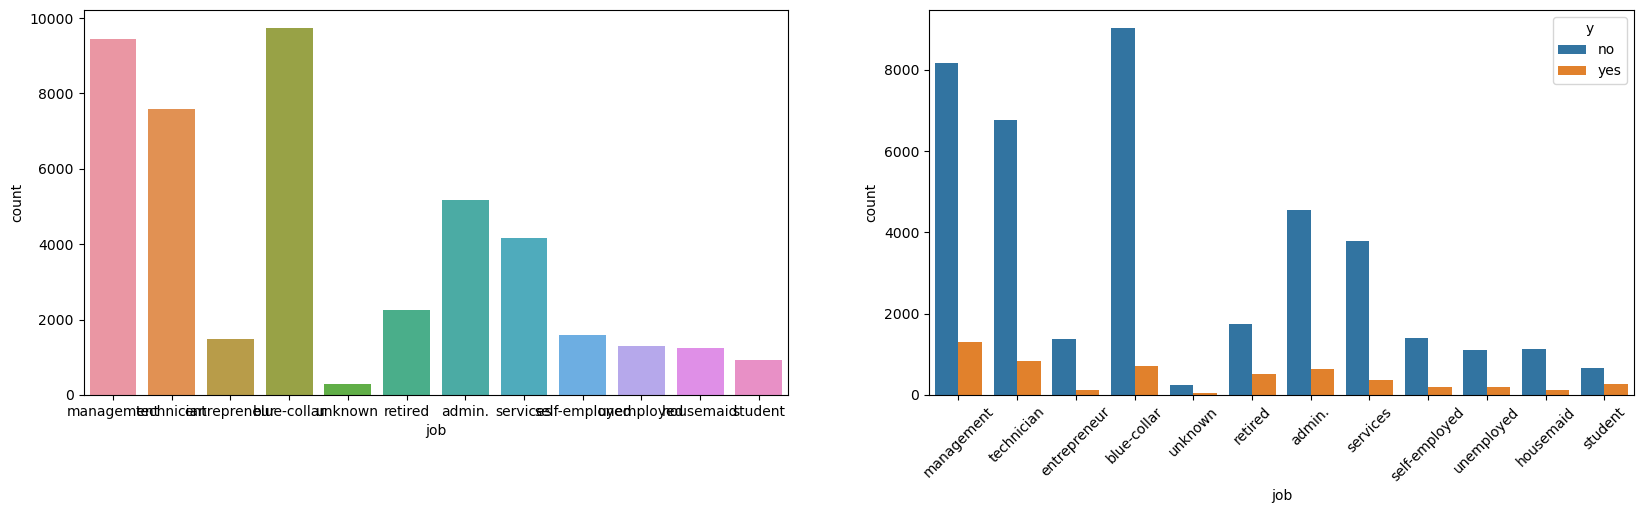

In [16]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='job',ax=axes[0],data=df)
sns.countplot(x='job', hue='y',ax=axes[1], data=df)
plt.xticks(rotation=45)
plt.xticks(rotation=45)

**Below is above observation based on Job status Analysis:**

**The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot)
Convertion rate is maximum: Management.
Based on Power law distribution, ~80% of people option for insurance is from (Management and Technician)**

(array([0, 1, 2]),
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

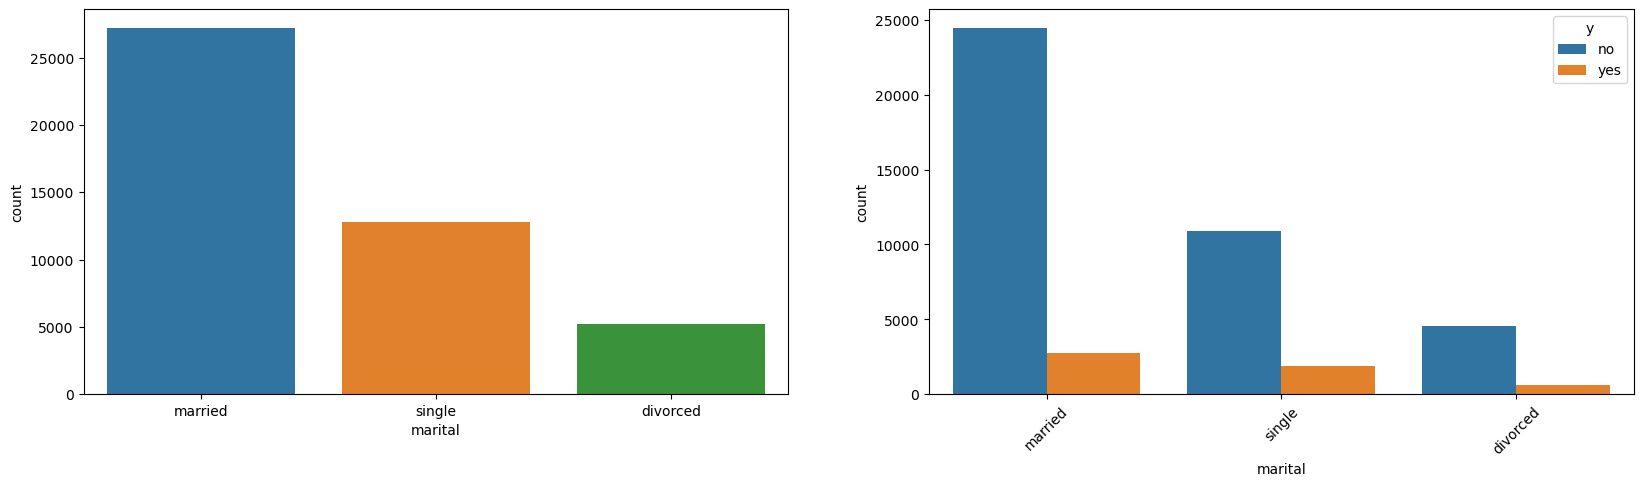

In [17]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='marital',ax=axes[0],data=df)
sns.countplot(x='marital', hue='y',ax=axes[1], data=df)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='mon', ylabel='count'>

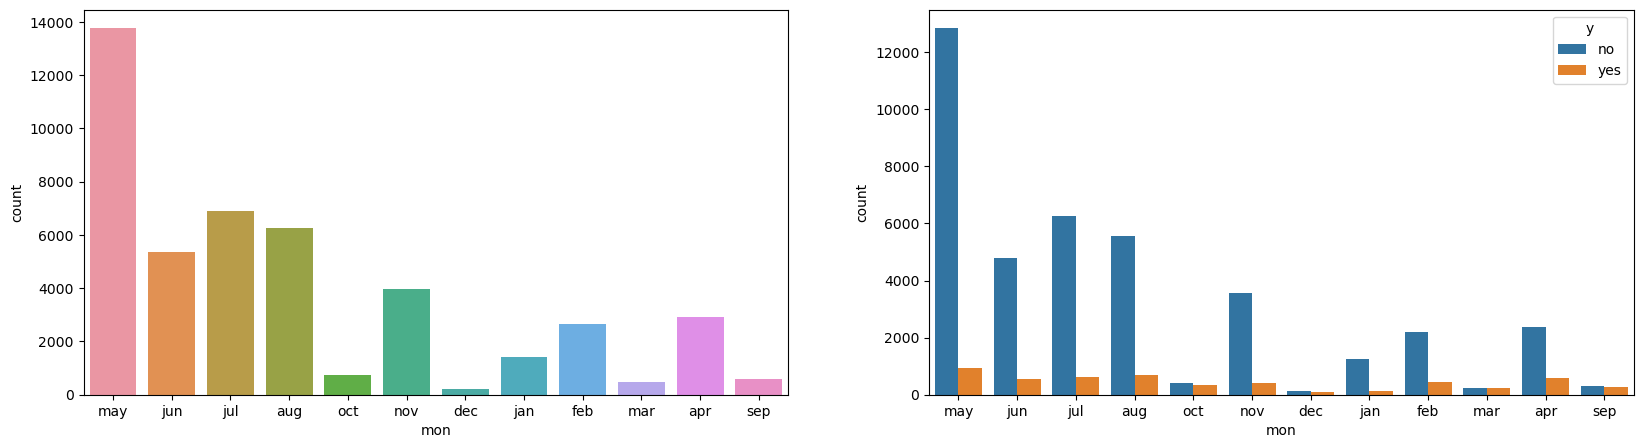

In [18]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='mon',ax=axes[0],data=df)
sns.countplot(x='mon', hue='y',ax=axes[1], data=df)

<AxesSubplot:xlabel='prev_outcome', ylabel='count'>

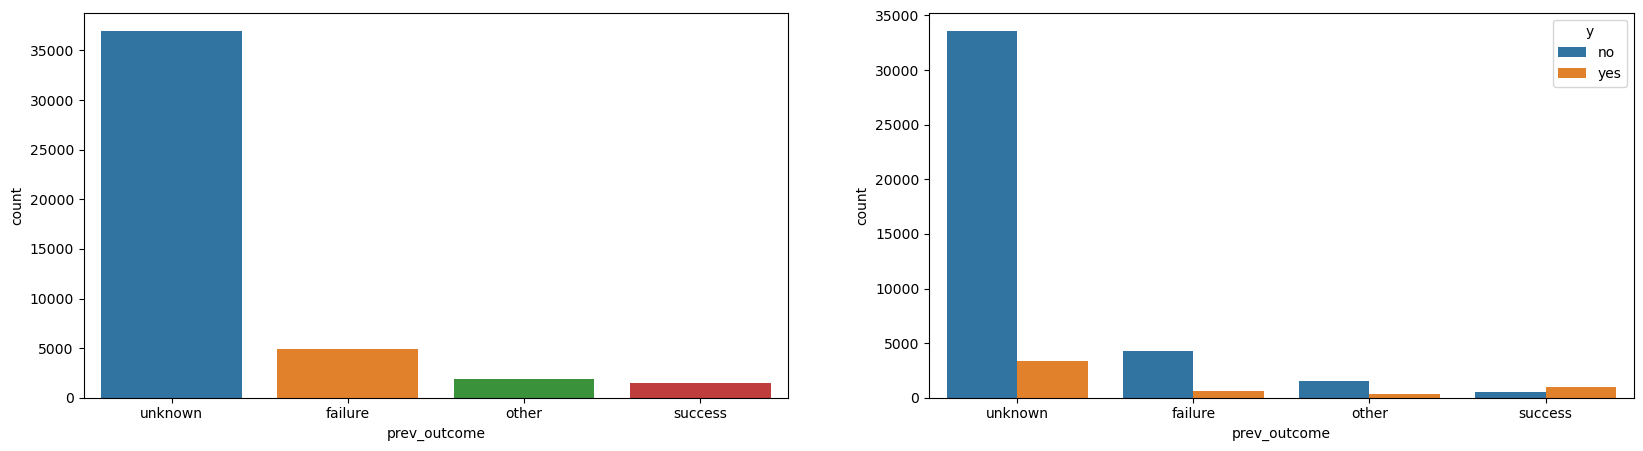

In [19]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='prev_outcome',ax=axes[0],data=df)
sns.countplot(x='prev_outcome', hue='y',ax=axes[1], data=df)

Observation:

Since the unknown values are 90% we are droping this columns, as it is not adding any values to the final outcome. --> Perform CHI square test and conclude based on result

Chi_square_test = (obs_value-expected_val)^2/expected_val

In [20]:
df_chi = pd.DataFrame()
df_chi["prev_outcome"] = df["prev_outcome"]
df_chi["mon"] = df["mon"]
ct = pd.crosstab(df_chi["prev_outcome"],df_chi["mon"])
ct

mon,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
prev_outcome,,,,,,,,,,,,
failure,737,237,41,529,289,109,133,75,1687,797,147,120
other,252,86,26,252,145,46,70,38,591,212,61,61
success,129,207,51,143,64,99,118,60,236,141,131,132
unknown,1814,5717,96,1725,905,6641,5020,304,11252,2820,399,266


<AxesSubplot:xlabel='education_qual', ylabel='count'>

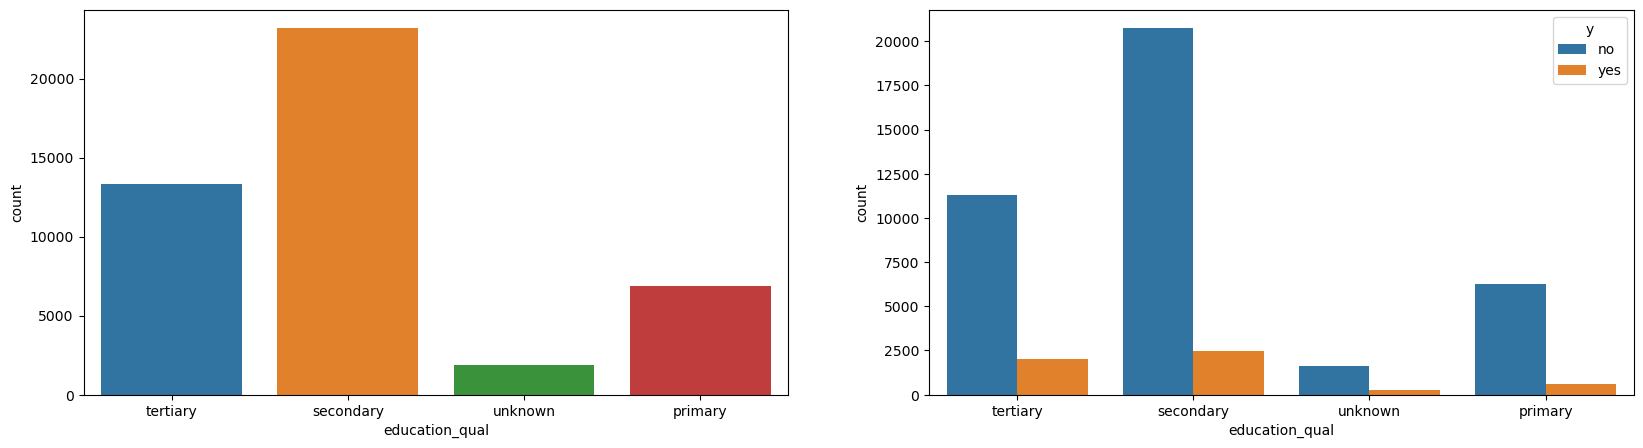

In [21]:
from scipy import stats
stats.chi2_contingency(ct.values)
     

fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='education_qual',ax=axes[0],data=df)
sns.countplot(x='education_qual', hue='y',ax=axes[1], data=df)

**Numerical Data Analysis**

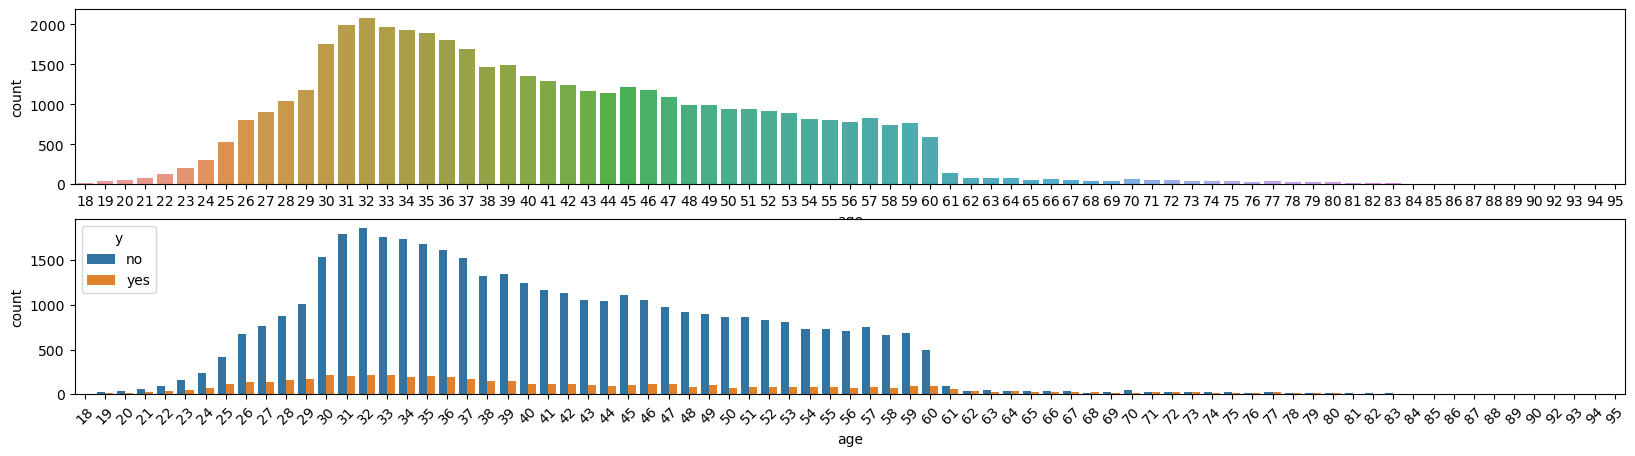

In [22]:
fig, axes=plt.subplots(nrows=2,figsize=(20,5))
sns.countplot(x='age',ax=axes[0],data=df)
sns.countplot(x='age', hue='y',ax=axes[1], data=df)
plt.xticks(rotation=45)
plt.show()

Observation:

1.People between 25 and 60 age are opting for insurance.
2.Senior citizens are not opting for insurance.
3.Also people below 18 years are not opting for insurance(Please keep age > 18 filter)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

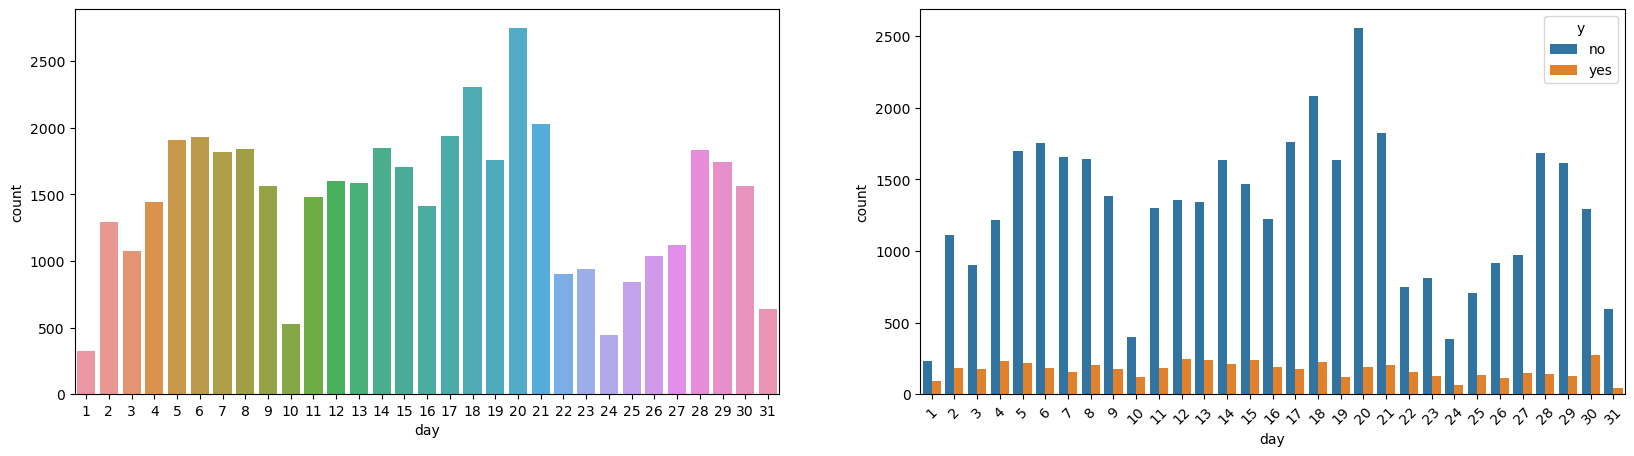

In [23]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='day',ax=axes[0],data=df)
sns.countplot(x='day', hue='y',ax=axes[1], data=df)
plt.xticks(rotation=45)

(array([   0,    1,    2, ..., 1570, 1571, 1572]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  T

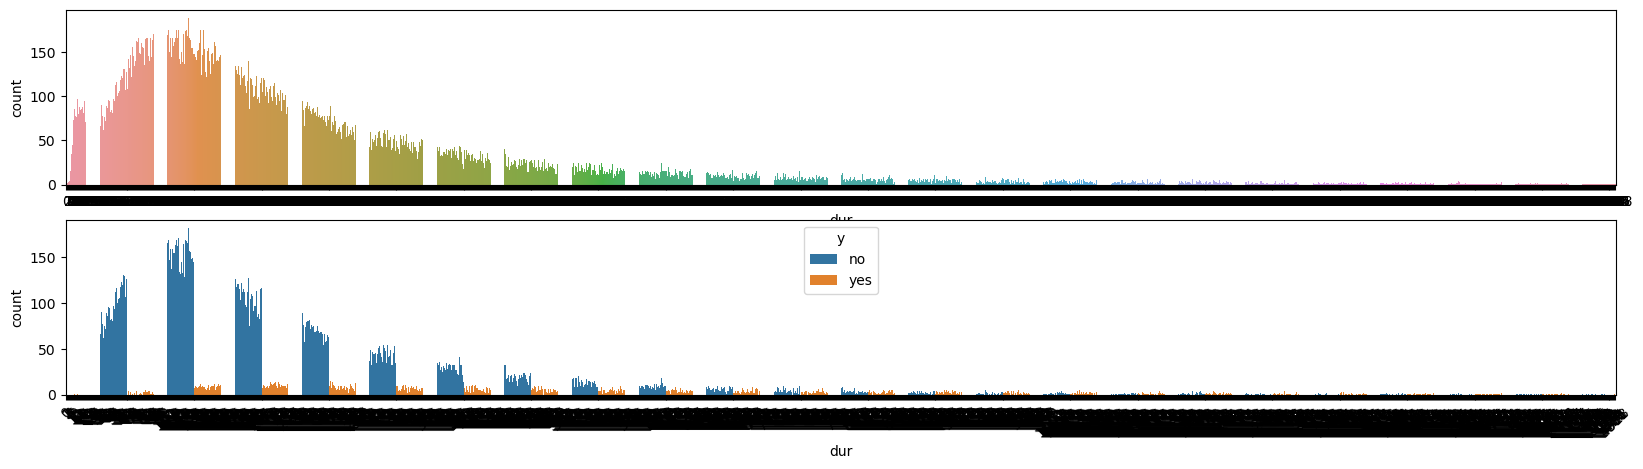

In [24]:
fig, axes=plt.subplots(nrows=2,figsize=(20,5))
sns.countplot(x='dur',ax=axes[0],data=df)
sns.countplot(x='dur', hue='y',ax=axes[1], data=df)
plt.xticks(rotation=45)

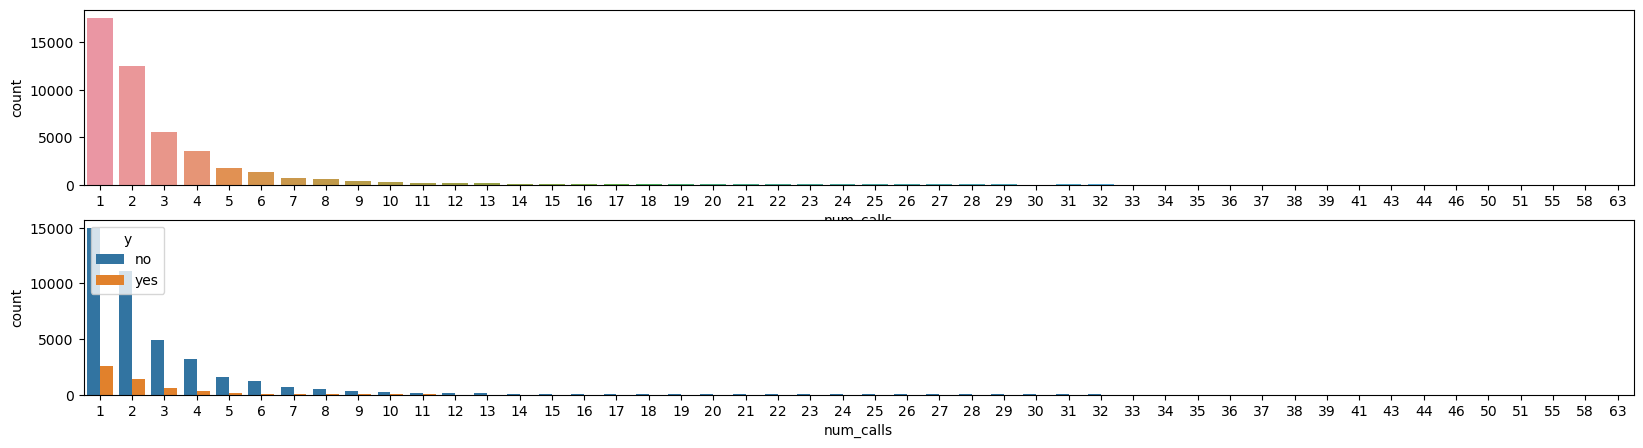

In [28]:
fig, axes=plt.subplots(nrows=2,figsize=(20,5))
sns.countplot(x='num_calls',ax=axes[0],data=df)
sns.countplot(x='num_calls', hue='y',ax=axes[1], data=df)
plt.show()

1.When contacted over phone, mostly customers opt for insurance in max 3 attempts.
2.As s cost effective approach, avoid reaching customer over phone after 3 attempts